In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/metropt/metro - 1.csv
/kaggle/input/metro3/data-20161201T0100-structure-20161201T0100(1).csv


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
metro_data = pd.read_csv('../input/metropt/metro - 1.csv')
metro_data.head()

,Start station,End station
0,Кировско-Выборгская_Девяткино,Кировско-Выборгская_Гражданский_проспект
1,Кировско-Выборгская_Гражданский_проспект,Кировско-Выборгская_Академическая
2,Кировско-Выборгская_Академическая,Кировско-Выборгская_Политехническая
3,Кировско-Выборгская_Политехническая,Кировско-Выборгская_Площадь_Мужества
4,Кировско-Выборгская_Площадь_Мужества,Кировско-Выборгская_Лесная


In [4]:
metro_graph = nx.from_pandas_edgelist(metro_data, source='Start station', target='End station')
metro_graph = nx.to_undirected(metro_graph)
print(nx.info(metro_graph))

Name: 
Type: Graph
Number of nodes: 72
Number of edges: 76
Average degree:   2.1111


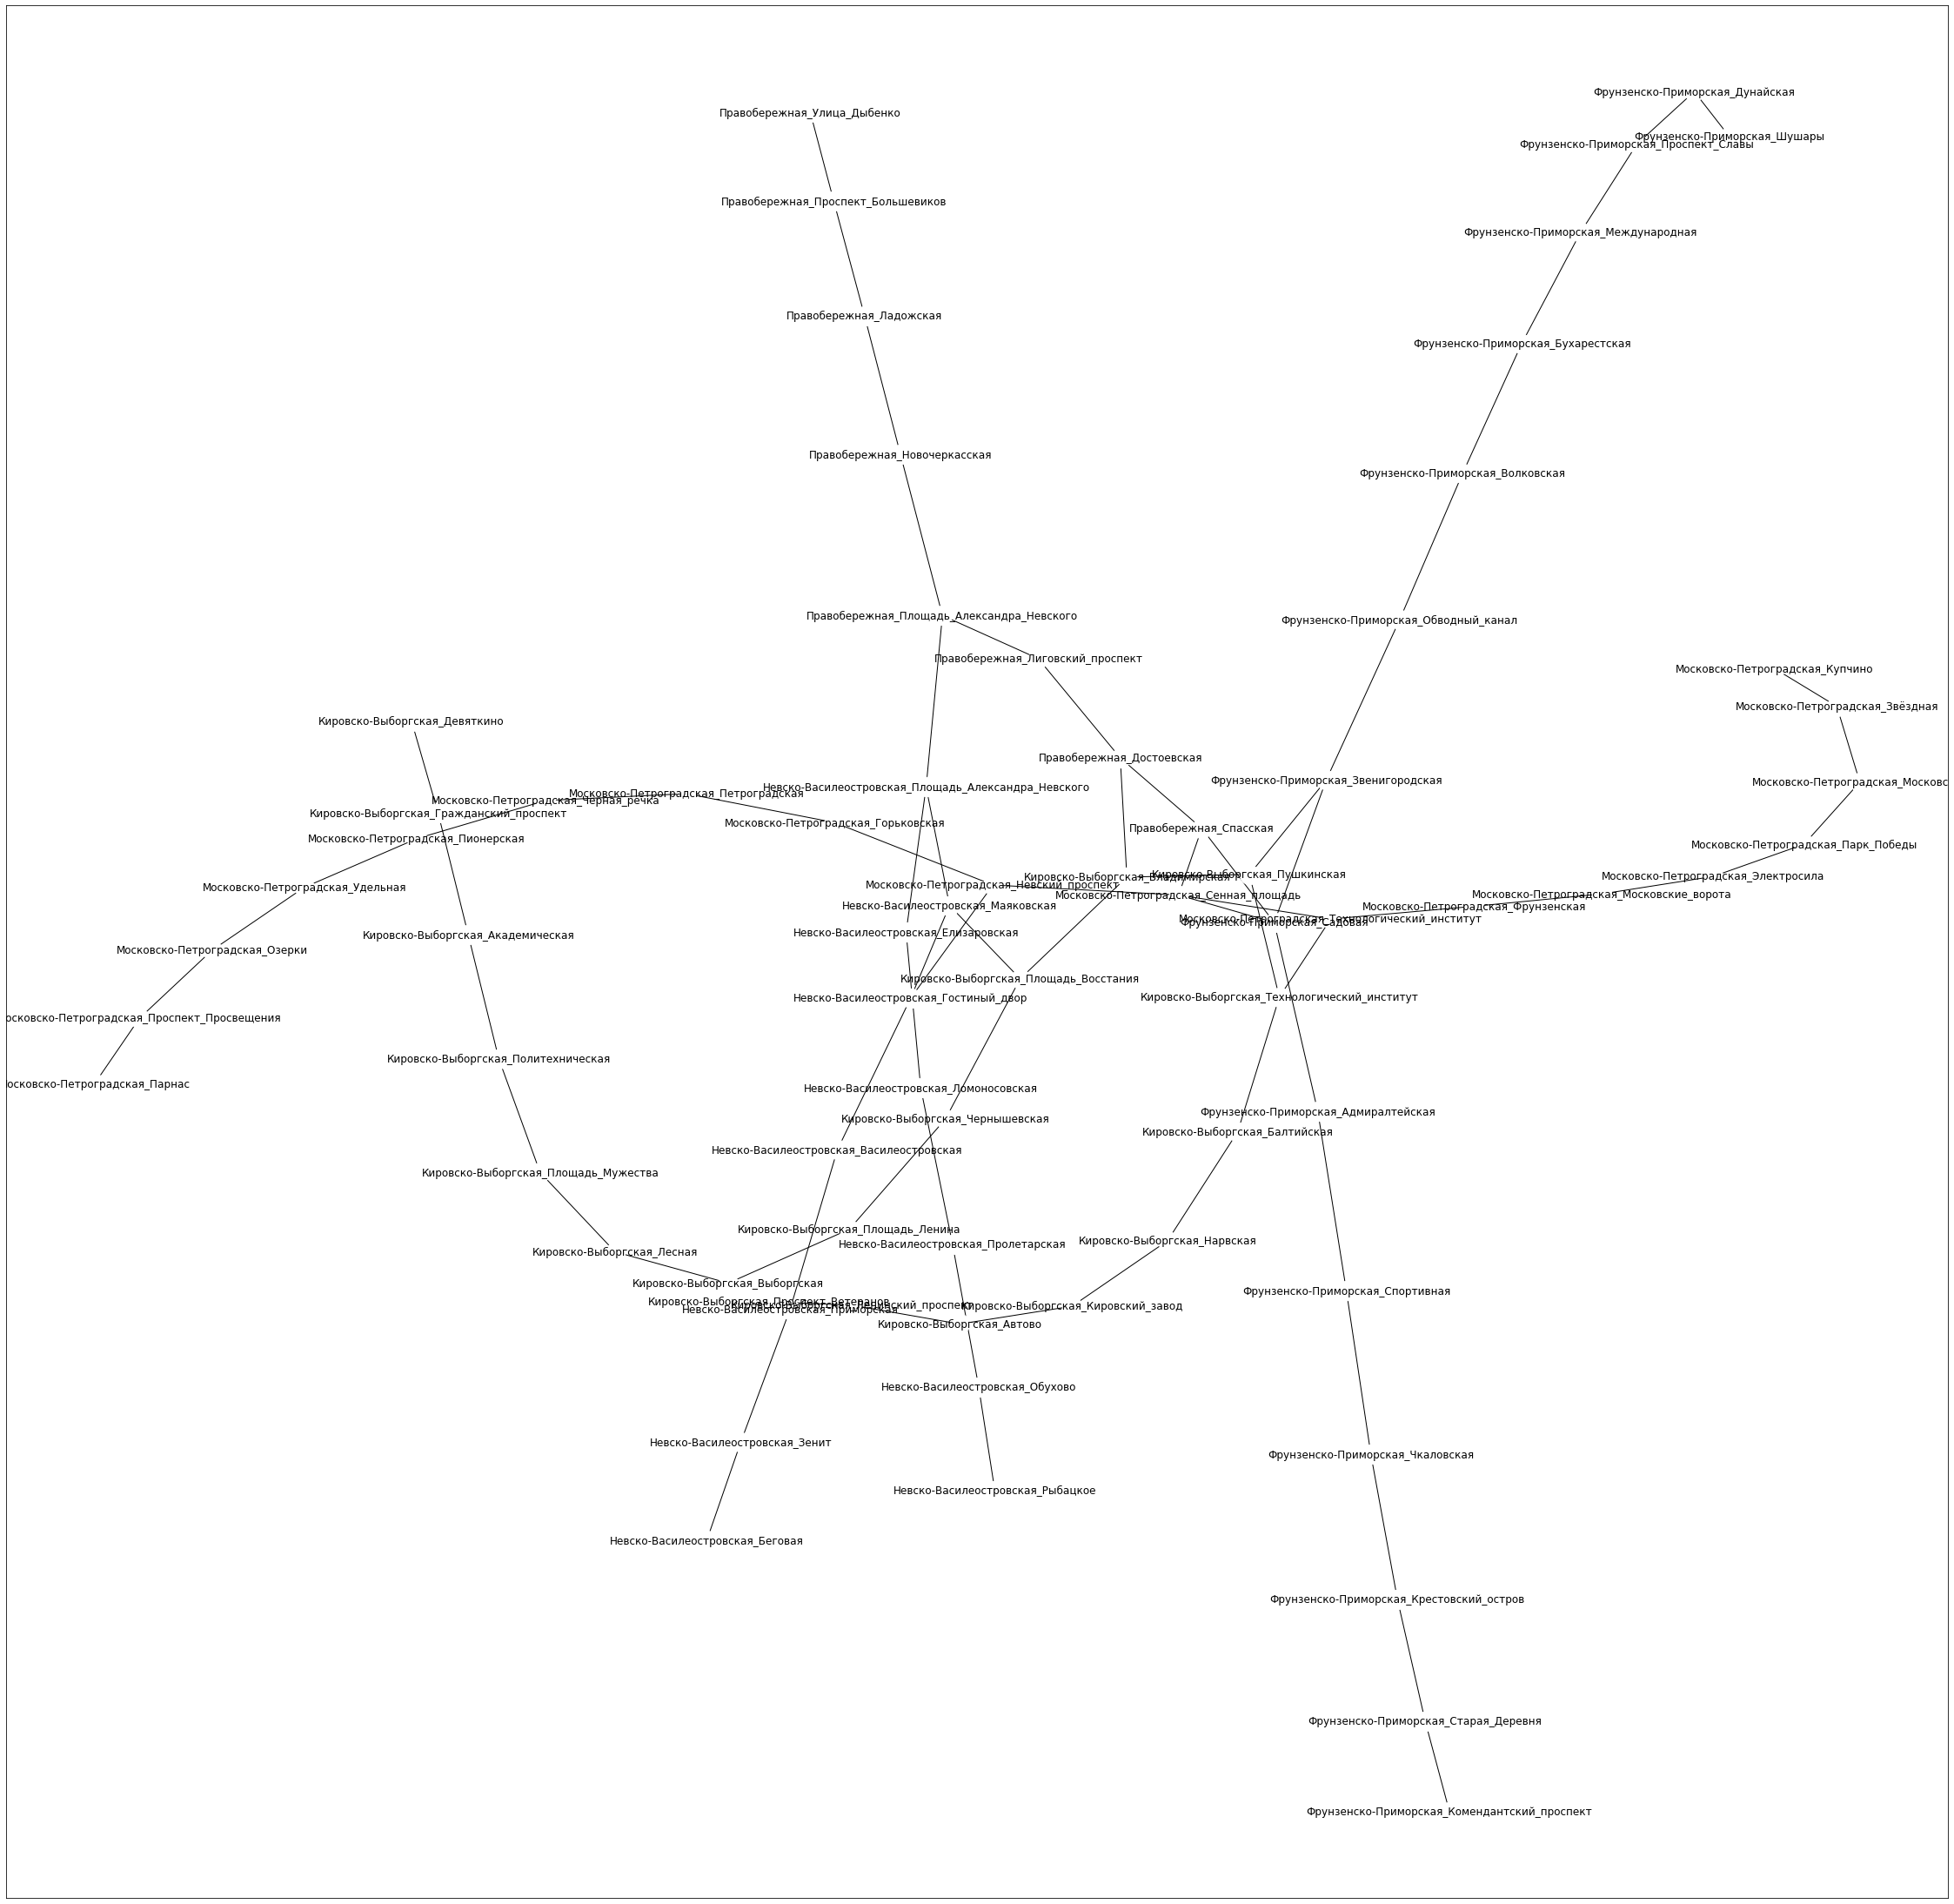

In [6]:
plt.figure(figsize=(40, 40)) 
nx.draw_networkx(metro_graph, with_labels=True, node_color='white', node_size=500)
plt.savefig('metro.png', bbox_inches='tight')

In [7]:
dict(metro_graph.degree)

{'Кировско-Выборгская_Девяткино': 1,
 'Кировско-Выборгская_Гражданский_проспект': 2,
 'Кировско-Выборгская_Академическая': 2,
 'Кировско-Выборгская_Политехническая': 2,
 'Кировско-Выборгская_Площадь_Мужества': 2,
 'Кировско-Выборгская_Лесная': 2,
 'Кировско-Выборгская_Выборгская': 2,
 'Кировско-Выборгская_Площадь_Ленина': 2,
 'Кировско-Выборгская_Чернышевская': 2,
 'Кировско-Выборгская_Площадь_Восстания': 3,
 'Кировско-Выборгская_Владимирская': 3,
 'Кировско-Выборгская_Пушкинская': 3,
 'Кировско-Выборгская_Технологический_институт': 3,
 'Кировско-Выборгская_Балтийская': 2,
 'Кировско-Выборгская_Нарвская': 2,
 'Кировско-Выборгская_Кировский_завод': 2,
 'Кировско-Выборгская_Автово': 2,
 'Кировско-Выборгская_Ленинский_проспект': 2,
 'Кировско-Выборгская_Проспект_Ветеранов': 1,
 'Московско-Петроградская_Парнас': 1,
 'Московско-Петроградская_Проспект_Просвещения': 2,
 'Московско-Петроградская_Озерки': 2,
 'Московско-Петроградская_Удельная': 2,
 'Московско-Петроградская_Пионерская': 2,
 'Мос

In [8]:
#кратчайшее расстояние между вершинами
nx.shortest_path(metro_graph, 'Фрунзенско-Приморская_Садовая', 'Правобережная_Достоевская')

['Фрунзенско-Приморская_Садовая',
 'Правобережная_Спасская',
 'Правобережная_Достоевская']

In [9]:
#кратчайшие пути от всех вершин до данной
nx.single_source_shortest_path(metro_graph, 'Правобережная_Достоевская')

{'Правобережная_Достоевская': ['Правобережная_Достоевская'],
 'Правобережная_Спасская': ['Правобережная_Достоевская',
  'Правобережная_Спасская'],
 'Правобережная_Лиговский_проспект': ['Правобережная_Достоевская',
  'Правобережная_Лиговский_проспект'],
 'Кировско-Выборгская_Владимирская': ['Правобережная_Достоевская',
  'Кировско-Выборгская_Владимирская'],
 'Фрунзенско-Приморская_Садовая': ['Правобережная_Достоевская',
  'Правобережная_Спасская',
  'Фрунзенско-Приморская_Садовая'],
 'Московско-Петроградская_Сенная_площадь': ['Правобережная_Достоевская',
  'Правобережная_Спасская',
  'Московско-Петроградская_Сенная_площадь'],
 'Правобережная_Площадь_Александра_Невского': ['Правобережная_Достоевская',
  'Правобережная_Лиговский_проспект',
  'Правобережная_Площадь_Александра_Невского'],
 'Кировско-Выборгская_Площадь_Восстания': ['Правобережная_Достоевская',
  'Кировско-Выборгская_Владимирская',
  'Кировско-Выборгская_Площадь_Восстания'],
 'Кировско-Выборгская_Пушкинская': ['Правобережная_

In [10]:
def plot_paths(G, paths):
    plt.figure(figsize=(36, 36))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=4000, node_color='white')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos)
    for path in paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

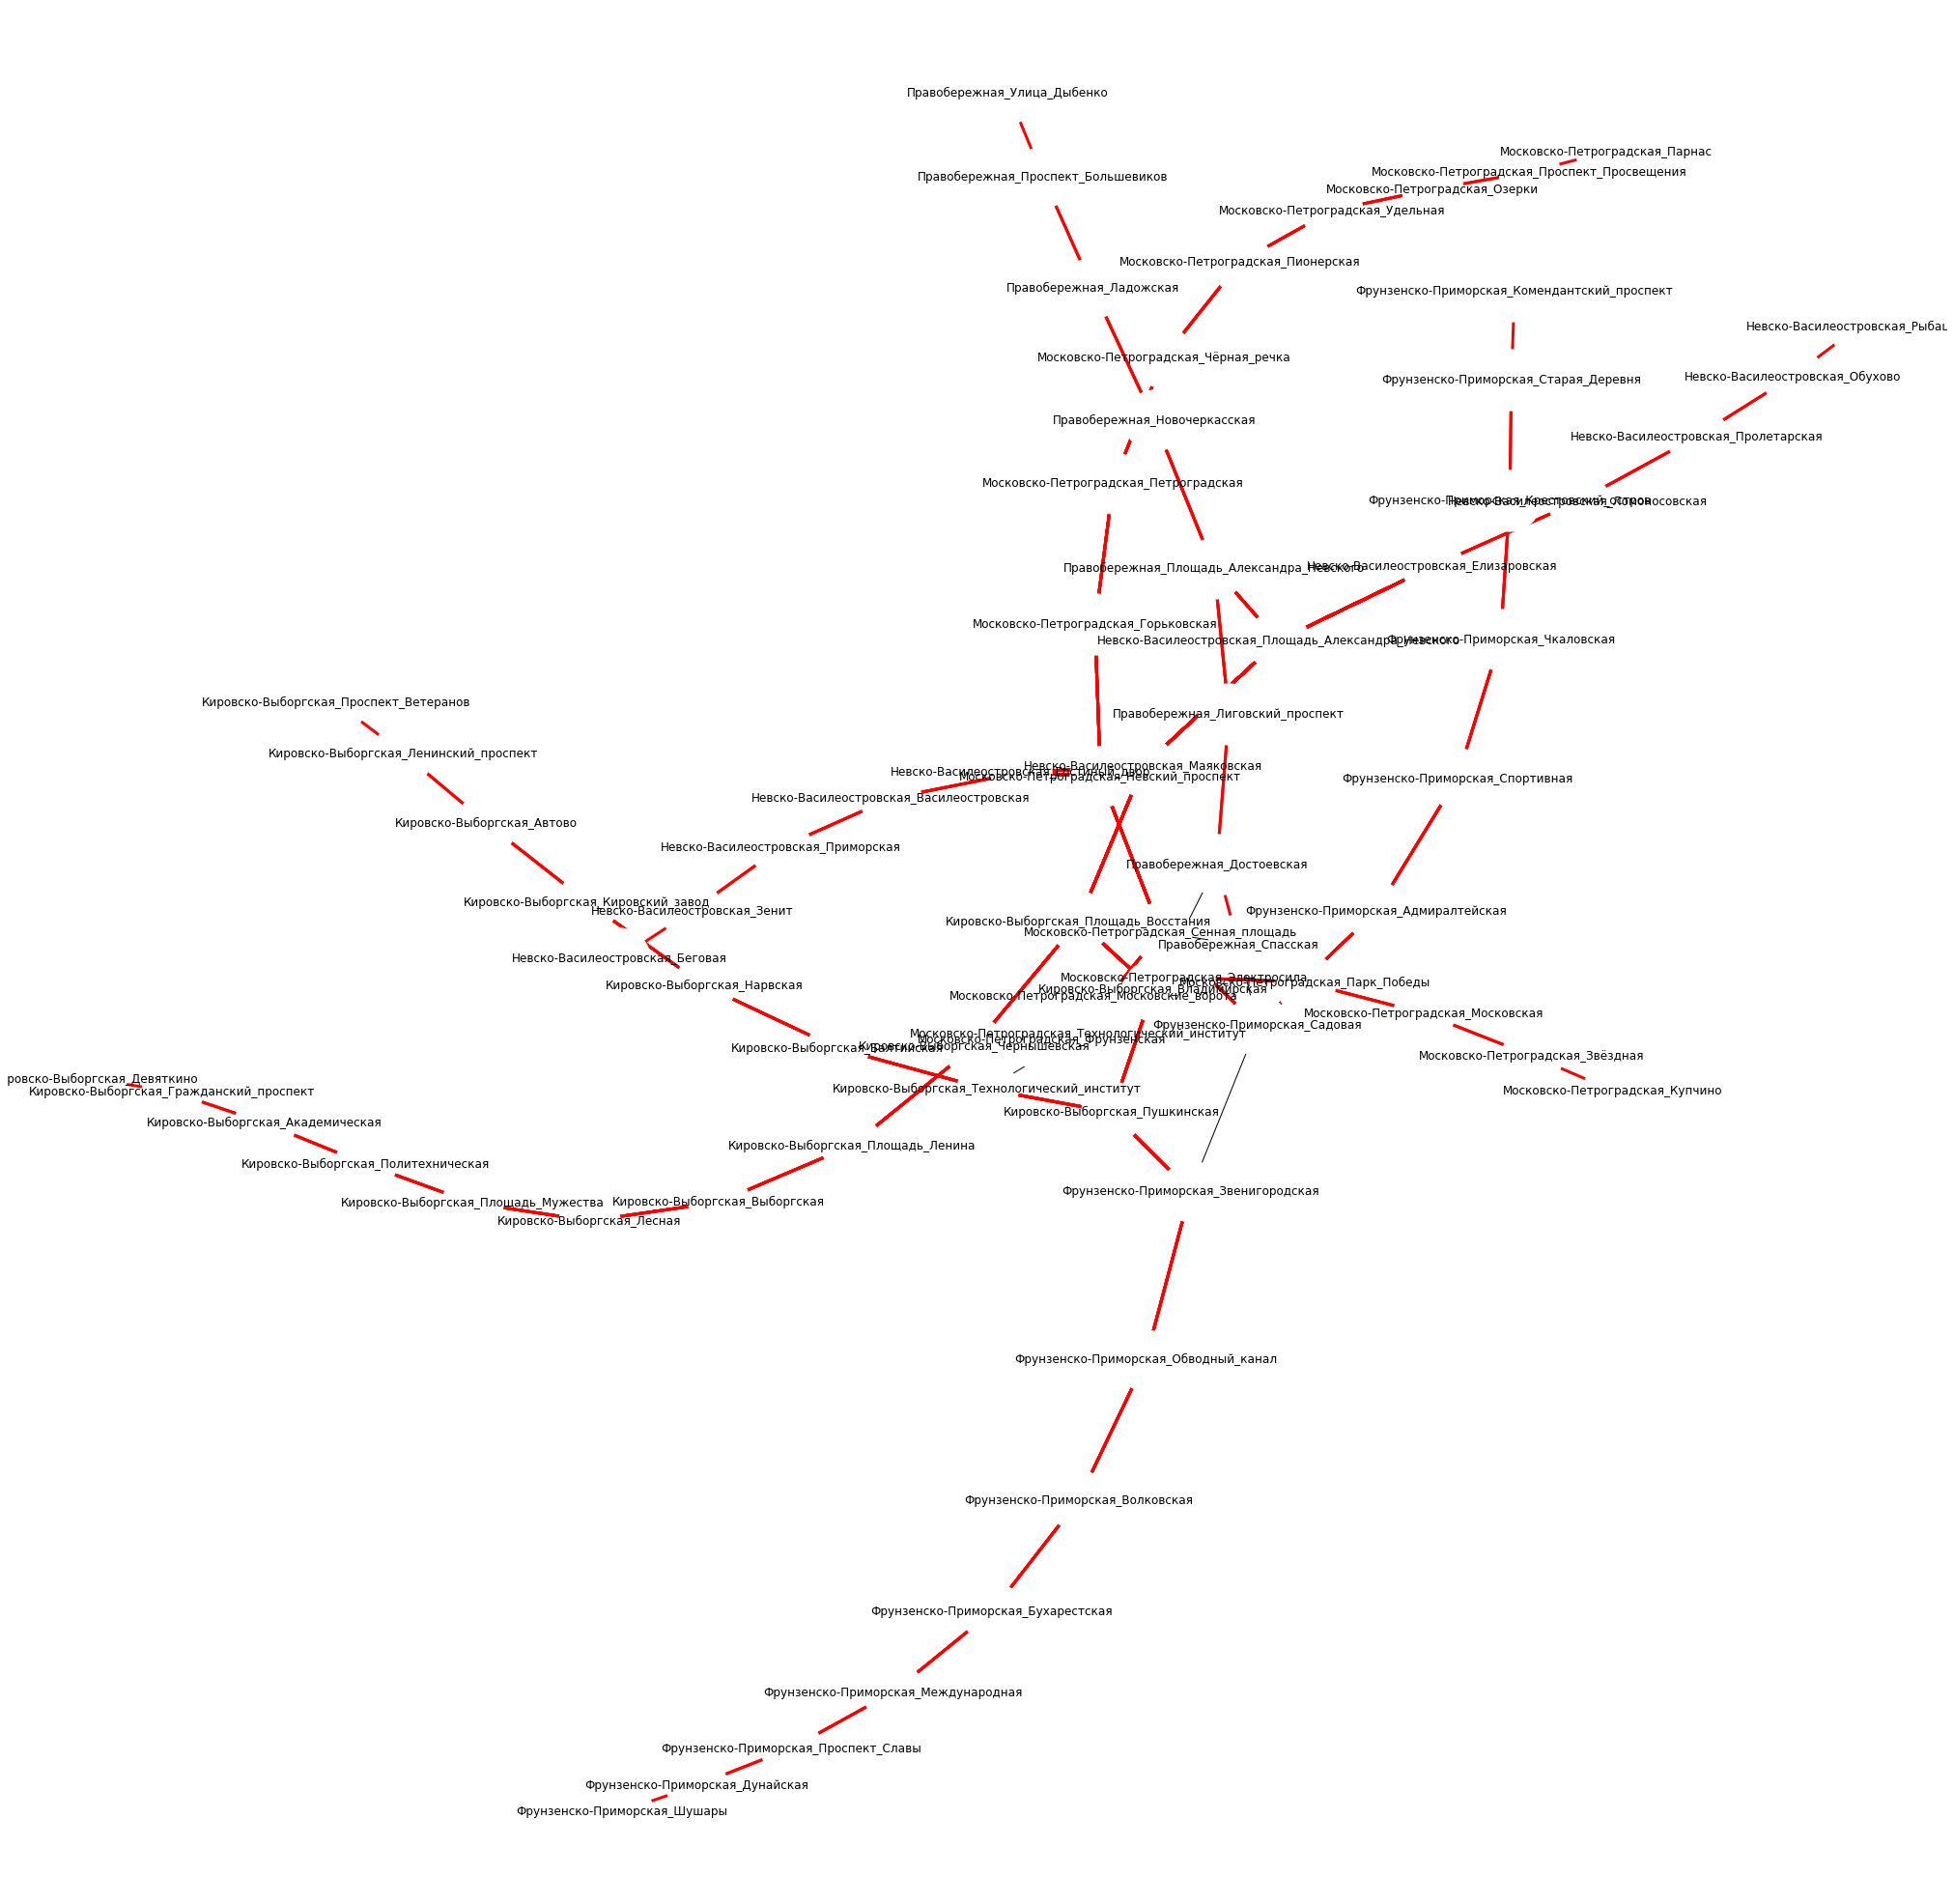

In [11]:
# Вывод кратчайших путей из одной вершины до всех остальных.
plot_paths(metro_graph, nx.single_source_shortest_path(metro_graph, 'Невско-Василеостровская_Елизаровская').values())

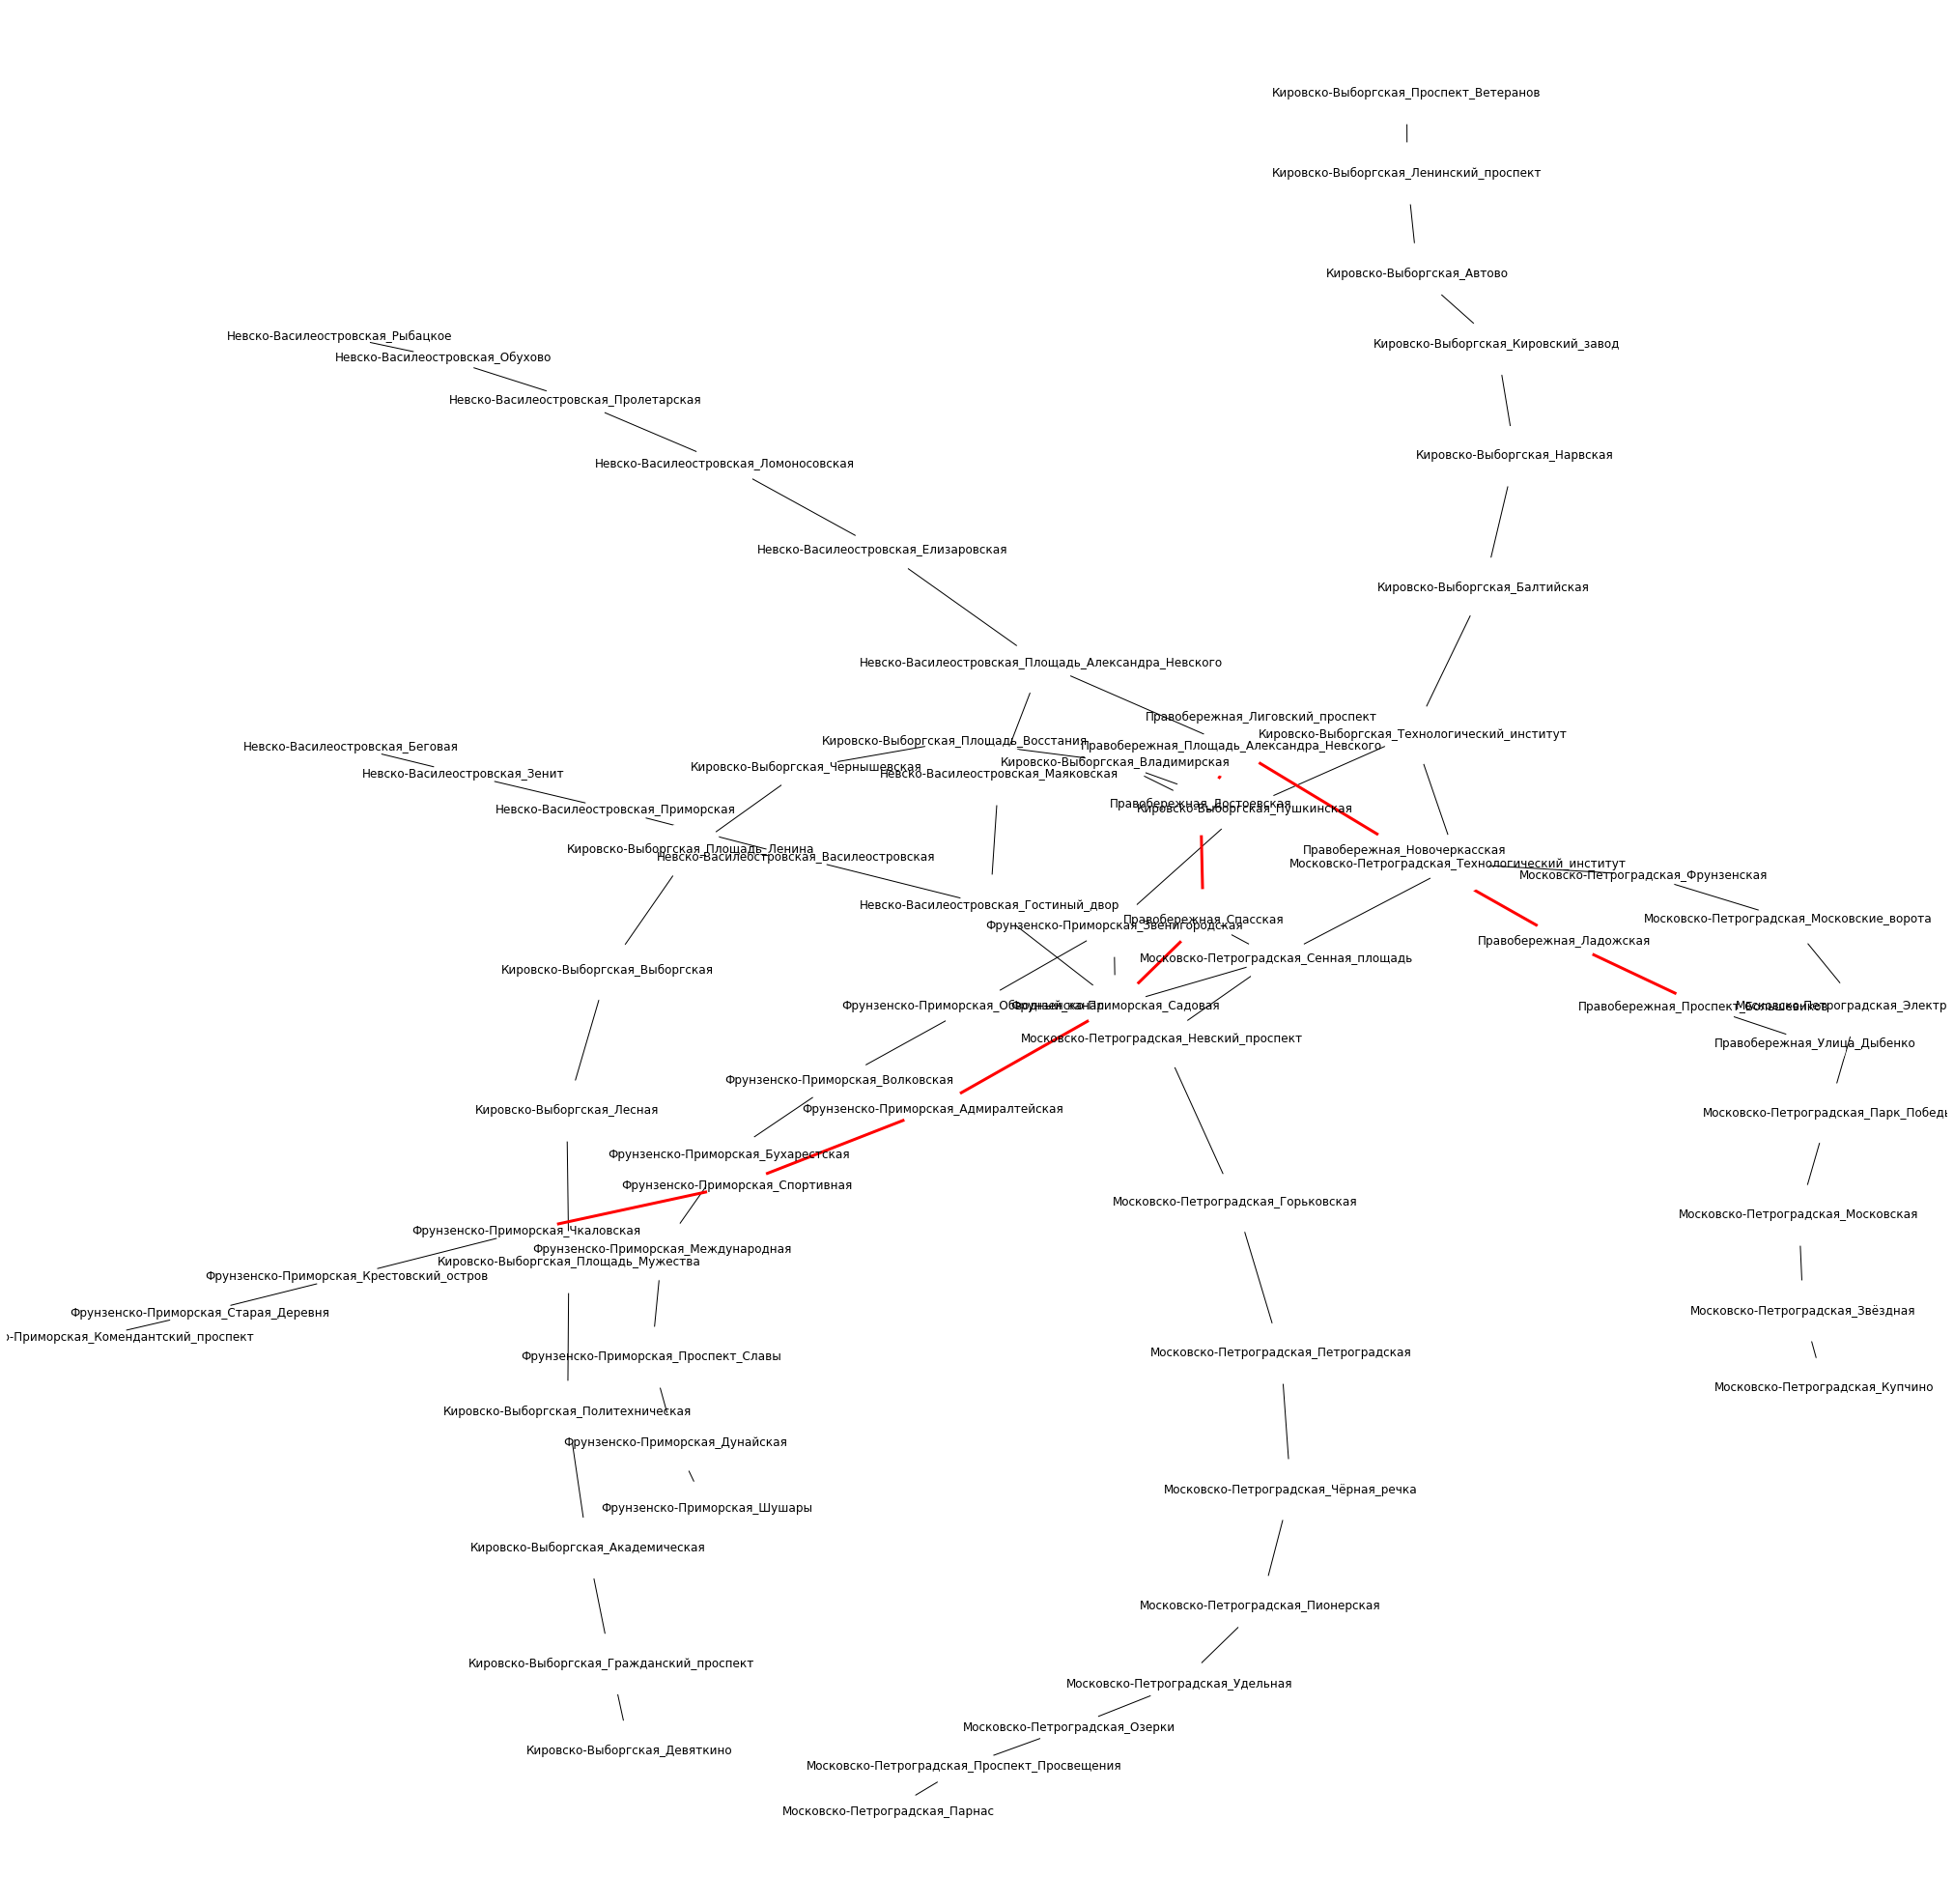

In [13]:
# Вывод нескольких кратчайших путей между конкретными парами вершин.
plot_paths(
    metro_graph,
    [
        nx.shortest_path(metro_graph, 'Фрунзенско-Приморская_Чкаловская', 'Правобережная_Проспект_Большевиков'),
    ]
)

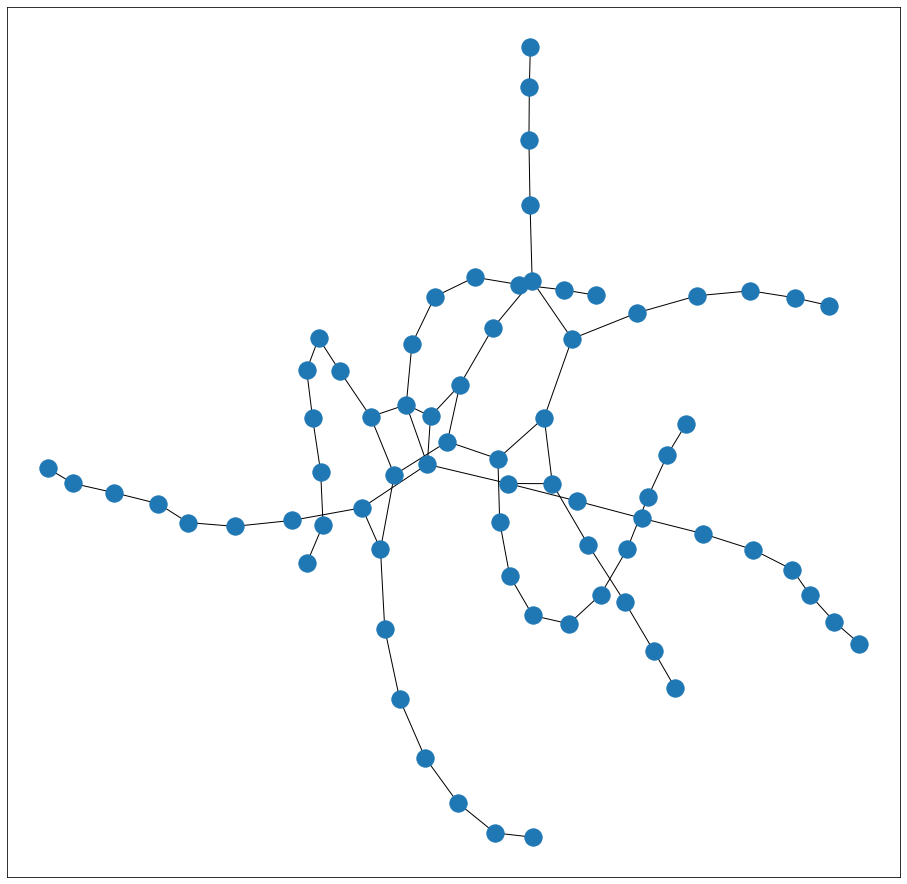

In [14]:
plt.figure(figsize=(16, 16)) 

nx.draw_networkx(metro_graph, with_labels=False)

In [15]:
line_colors = {
    'Кировско-Выборгская': 'red',
    'Невско-Василеостровская': 'green',
    'Московско-Петроградская': 'blue',
    'Правобережная': 'orange',
    'Фрунзенско-Приморская': 'violet'
}

In [16]:
def return_station_color(station, line_colors):
    for line in line_colors:
        if station.startswith(line):
            return line_colors[line]
    print('Something went wrong: couldn\'t find the line for station {}.\nReturn black color.'.format(station))
    return 'black'

In [ ]:
return_station_color('Правобережная', line_colors)